# CS 155 Mini Project 2

In [ ]:
import numpy as np
import csv
import pandas as pd
import itertools
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly as plty
# import pygal as pyg


---
## Import Data and Preprocessing

In [ ]:
# import data from github

!wget -O movies.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv
!wget -O data.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv

--2023-03-01 17:27:41--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104093 (102K) [text/plain]
Saving to: ‘movies.csv’

movies.csv          100%[===================>] 101.65K  --.-KB/s    in 0.02s   

2023-03-01 17:27:41 (4.75 MB/s) - ‘movies.csv’ saved [104093/104093]

--2023-03-01 17:27:41--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [ ]:
# open CSV with pandas
movies_raw = pd.read_csv("movies.csv")
data_raw = pd.read_csv("data.csv")


In [ ]:
# Process CSV files into usable data

movie_data = movies_raw.drop(["Movie Title"], axis =1 )
# movie_data = movies_raw.drop(["Unknown"], axis =1 )    # drop the Unknown column, seems useless?

In [ ]:
# convert to numpy arrays
movie_data = movie_data.to_numpy()
users_data = data_raw.to_numpy()

print("Movie data set: ")
print(movie_data.shape)

print("Users data set: ")
print(users_data.shape)


Movie data set: 
(1500, 20)
Users data set: 
(121501, 3)


---
## Basic Visualization

### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### 1. All ratings in the MovieLens Dataset

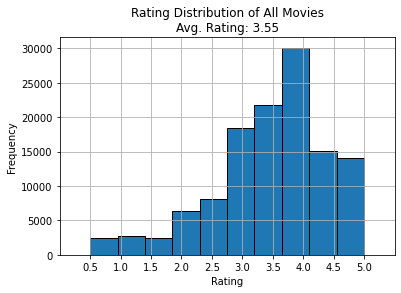

In [ ]:
# list of possible ratings
rating_vals = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# number of movies in data set
num_movies = movie_data.shape[0]

# just need the movie IDs and ratings
all_ratings = users_data[:,2]

# TODO: combine all ratings into a histogram
hist_data = all_ratings
avg_rating = np.average(hist_data)
title_string = "Rating Distribution of All Movies\nAvg. Rating: {:.2f}".format(avg_rating)
plt.grid()
plt.xlim(xmin = 0, xmax=5.5)
plt.hist(hist_data, edgecolor='k', align='mid')
plt.xticks(rating_vals)
plt.title(title_string)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("Std. Dev: {}".format(np.std(hist_data)))

Std. Dev: 1.0315848808878352


### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### 2. All ratings in top 10 popular movies

In [ ]:
# init list of movies and average ratings
ratings_list = []

# number of movies in data set
num_movies = movie_data.shape[0]

# just need the movie IDs and ratings
movie_ratings = users_data[:,1:]

# compute average rating of all movies
for ID in range(num_movies):

    # index where movie_ID shows up
    idx = np.where(movie_ratings[:,0] == ID)

    # get list of ratings for this movie
    movie_ID_ratings = movie_ratings[idx,1]

    # get number of ratings
    num_ratings = len(movie_ID_ratings[0])

    # store rating
    ratings_list.append([ID,num_ratings])

# determine top ten movies
ratings_list = np.array(ratings_list)
sorted_idx = np.argsort(ratings_list[:,1])
ratings_list = ratings_list[sorted_idx]
ratings_list = np.flipud(ratings_list)       # if you comment this out, returns least popular

# print the Top N movies and the ratings and save
top_n = 10
mov_info_list = []
print("Top {} Popular Movies:".format(top_n))
for j in range(top_n):

    # get movie title and rating
    mov_ID, num_ratings = ratings_list[j]
    mov = movies_raw.loc[movies_raw["Movie ID"] == mov_ID]
    mov_title = mov.iloc[0]["Movie Title"]

    # store movie info
    mov_info = [int(mov_ID), mov_title, num_ratings]
    mov_info_list.append(mov_info)

    print("{}) {} , No. Ratings: {}".format(j+1,mov_title, num_ratings))


Top 10 Popular Movies:
1) Lord of the Rings: The Fellowship of the Ring, The (2001) , No. Ratings: 747
2) Lord of the Rings: The Two Towers, The (2002) , No. Ratings: 713
3) Lord of the Rings: The Return of the King, The (2003) , No. Ratings: 698
4) Shrek (2001) , No. Ratings: 610
5) Pirates of the Caribbean: The Curse of the Black Pearl (2003) , No. Ratings: 585
6) Dark Knight, The (2008) , No. Ratings: 561
7) Finding Nemo (2003) , No. Ratings: 528
8) Kill Bill: Vol. 1 (2003) , No. Ratings: 520
9) Monsters, Inc. (2001) , No. Ratings: 519
10) Ocean's Eleven (2001) , No. Ratings: 517


Generate Bar Grpahs

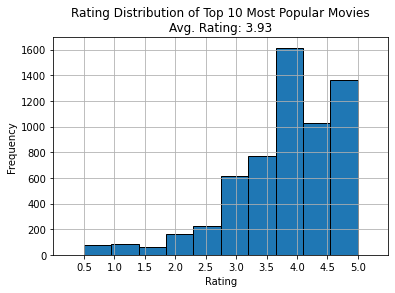

In [ ]:
# list of possible ratings
rating_vals = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# get list or ratings for our top ten
mov_info_list_= []
for mov_info in mov_info_list:

    # extract info
    mov_ID, mov_title, rating = mov_info

    # get all movie ratings
    idx = np.where(movie_ratings[:,0] == mov_ID)
    movie_ID_ratings = movie_ratings[idx,1]

    # store movie info into list
    mov_info = [mov_ID, mov_title, rating, movie_ID_ratings[0]]
    mov_info_list_.append(mov_info)

# # plot INDIVIDUAL HISTOGRAMS
# for i in range(top_n):

#     mov_info = mov_info_list_[i]
#     hist_data = mov_info[3]
#     title_string = "{} \n ID: {}, No. Ratings: {:.0f}".format(mov_info[1], mov_info[0], mov_info[2])
#     plt.grid()
#     plt.xlim(xmin = 0, xmax=5.5)
#     plt.hist(hist_data, edgecolor='k', align='mid')
#     plt.xticks(rating_vals)
#     plt.title(title_string)
#     plt.xlabel("Rating")
#     plt.ylabel("Frequency")
#     plt.show()

# TODO: can combine all ratings into one big histogram
hist_data = []
for i in range(top_n):
      mov_info = mov_info_list_[i]
      hist_data.append(mov_info[3])

hist_data = list(itertools.chain.from_iterable(hist_data))
avg_rating = np.average(np.array(hist_data))
title_string = "Rating Distribution of Top 10 Most Popular Movies\nAvg. Rating: {:.2f}".format(avg_rating)
plt.grid()
plt.xlim(xmin = 0, xmax=5.5)
plt.hist(hist_data, edgecolor='k', align='mid')
plt.xticks(rating_vals)
plt.title(title_string)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("Std. Dev: {}".format(np.std(hist_data)))

Std. Dev: 0.9634611141119822


### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### 3. All ratings in top 10 best movies

Determine Top 10 Movies

In [ ]:
# init list of movies and average ratings
ratings_list = []

# number of movies in data set
num_movies = movie_data.shape[0]

# just need the movie IDs and ratings
movie_ratings = users_data[:,1:]

# compute average rating of all movies
for ID in range(num_movies):

    # index where movie_ID shows up
    idx = np.where(movie_ratings[:,0] == ID)

    # get list of ratings for this movie
    movie_ID_ratings = movie_ratings[idx,1]

    # get average rating
    avg_rating = np.average(movie_ID_ratings)

    # store rating
    ratings_list.append([ID,avg_rating])

# determine top ten movies
ratings_list = np.array(ratings_list)
sorted_idx = np.argsort(ratings_list[:,1])
ratings_list = ratings_list[sorted_idx]
ratings_list = np.flipud(ratings_list)       # if you comment this out, returns worst movies

# print the Top N movies and the ratings and save
top_n = 10
mov_info_list = []
print("Top {} Best Movies:".format(top_n))
for j in range(top_n):

    # get movie title and rating
    mov_ID, rating = ratings_list[j]
    mov = movies_raw.loc[movies_raw["Movie ID"] == mov_ID]
    mov_title = mov.iloc[0]["Movie Title"]

    # store movie info
    mov_info = [int(mov_ID), mov_title, rating]
    mov_info_list.append(mov_info)

    print("{}) {} , Rating: {:.2f}".format(j+1,mov_title, rating))


Top 10 Best Movies:
1) Planet Earth (2006) , Rating: 4.47
2) Black Mirror: White Christmas (2014) , Rating: 4.45
3) Akeelah and the Bee (2006) , Rating: 4.30
4) Barbarian Invasions, The (Les invasions barbares) (2003) , Rating: 4.28
5) Louis C.K.: Live at The Comedy Store (2015) , Rating: 4.26
6) Blue Is the Warmest Color (La vie d'Adèle) (2013) , Rating: 4.26
7) Elite Squad: The Enemy Within (Tropa de Elite 2 - O Inimigo Agora É Outro) (2010) , Rating: 4.24
8) City of God (Cidade de Deus) (2002) , Rating: 4.20
9) Incendies (2010) , Rating: 4.19
10) Piper (2016) , Rating: 4.18


Generate bar graphs

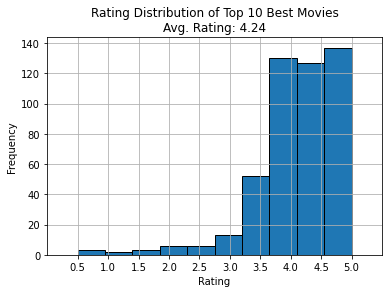

In [ ]:
# list of possible ratings
rating_vals = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# get list or ratings for our top ten
mov_info_list_= []
for mov_info in mov_info_list:

    # extract info
    mov_ID, mov_title, rating = mov_info

    # get all movie ratings
    idx = np.where(movie_ratings[:,0] == mov_ID)
    movie_ID_ratings = movie_ratings[idx,1]

    # # build frequency of ratings for each movie
    # freq_list = []
    # for rating_val in rating_vals:
    #     movie_ID_ratings_list = movie_ID_ratings.tolist()
    #     movie_ID_ratings_list = movie_ID_ratings_list[0]
    #     freq = movie_ID_ratings_list.count(rating_val)
    #     freq_list.append(freq)

    # create a new object for our list
    # mov_info = [mov_ID, mov_title, rating, freq_list, movie_ID_ratings[0]]

    # store movie info into list
    mov_info = [mov_ID, mov_title, rating, movie_ID_ratings[0]]
    mov_info_list_.append(mov_info)

# # plot histograms
# for i in range(top_n):

#     mov_info = mov_info_list_[i]
#     hist_data = mov_info[3]
#     title_string = "{} \n ID: {}, Avg. Rating: {:.2f}".format(mov_info[1], mov_info[0], mov_info[2])
#     plt.grid()
#     plt.xlim(xmin = 0, xmax=5.5)
#     plt.hist(hist_data, edgecolor='k')
#     plt.title(title_string)
#     plt.xticks(rating_vals)
#     plt.xlabel("Rating")
#     plt.ylabel("Frequency")
#     plt.show()

# TODO: can combine all ratings into one big histogram
hist_data = []
for i in range(top_n):
      mov_info = mov_info_list_[i]
      hist_data.append(mov_info[3])

hist_data = list(itertools.chain.from_iterable(hist_data))
avg_rating = np.average(np.array(hist_data))
title_string = "Rating Distribution of Top 10 Best Movies\nAvg. Rating: {:.2f}".format(avg_rating)
plt.grid()
plt.xlim(xmin = 0, xmax=5.5)
plt.hist(hist_data, edgecolor='k', align='mid')
plt.xticks(rating_vals)
plt.title(title_string)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("Std. Dev: {}".format(np.std(hist_data)))

Std. Dev: 0.761022618308955


### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### 4. All ratings of movies from 3 genres

In [ ]:
# print all movie genres
col_labels = movies_raw.columns
for i in range(len(col_labels)):
    print("{}: {}".format(i, col_labels[i]))

0: Movie ID
1: Movie Title
2: Unknown
3: Action
4: Adventure
5: Animation
6: Children
7: Comedy
8: Crime
9: Documentary
10: Drama
11: Fantasy
12: Film-Noir
13: Horror
14: Musical
15: Mystery
16: Romance
17: Sci-Fi
18: Thriller
19: War
20: Western


In [ ]:
# pick favorite genres
fav_idx = [7,9,13]
genres_fav = list(col_labels[fav_idx])

print("Our favorite 3 genres:")
for j in range(len(genres_fav)):
    print("{}) {}".format(j+1, genres_fav[j]))


Our favorite 3 genres:
1) Comedy
2) Documentary
3) Horror


Genre: Comedy
Avg. Rating: 3.4328329777506856
Std. Dev: 1.0716617825449266
No. Ratings: 39372
Genre: Documentary
Avg. Rating: 3.672189349112426
Std. Dev: 0.9862645141936135
No. Ratings: 1690
Genre: Horror
Avg. Rating: 3.3187658947932004
Std. Dev: 1.0582112923601519
No. Ratings: 7471


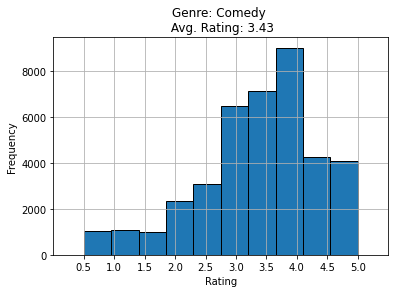

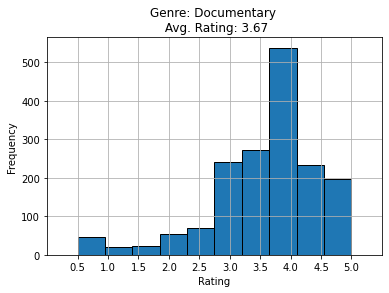

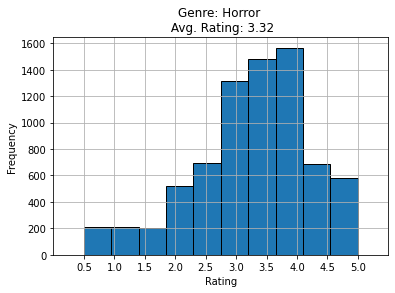

In [ ]:
# extract columns with relevant info
col_extract = list.copy(genres_fav)
col_extract.insert(0,'Movie ID')

# convert to numpy array
movie_data_fav = movies_raw[col_extract]
movie_data_fav = movie_data_fav.to_numpy()

# just need the movie IDs and ratings
movie_ratings = users_data[:,1:]


# number of movies in data set
num_movies = movie_data.shape[0]

# just need the movie IDs and ratings
movie_ratings = users_data[:,1:]

# determine which movies belong to what genre
movies_genre_list = []   # note that a movie can be in multiple categories

for k in range(len(genres_fav)):

    # loop through all movies to see if in a genre
    genre_list = []
    for ID in range(num_movies):

        mov_info = movie_data_fav[ID]

        # check if movie is in genre
        if mov_info[k+1] == 1:
            genre_list.append(ID)

    movies_genre_list.append(genre_list)

# TODO: produce 3 plots for you favorite genres
# get ratings for each category and plot
for m in range(len(movies_genre_list)):

    mov_list_ = movies_genre_list[m]

    # pull ratings for each movie
    genre_ratings = []
    for ID in mov_list_:

        # index where movie_ID shows up
        idx = np.where(movie_ratings[:,0] == ID)

        # get list of ratings for this movie
        movie_ID_ratings = movie_ratings[idx,1]
        movie_ID_ratings = movie_ID_ratings[0]

        # append vector of ratings for movie ID
        genre_ratings.append(movie_ID_ratings)

    # plot histogram
    hist_data = list(itertools.chain.from_iterable(genre_ratings))
    avg_rating = np.average(np.array(hist_data))
    title_string = "Genre: {} \n Avg. Rating: {:.2f}".format(genres_fav[m], avg_rating)
    # plt.subplot(3,1,m+1)
    # plt.subplots_adjust(hspace=1.5)
    plt.figure()
    plt.grid()
    plt.xlim(xmin = 0, xmax=5.5)
    plt.hist(hist_data, edgecolor='k')
    plt.title(title_string)
    plt.xticks(rating_vals)
    plt.xlabel("Rating")
    plt.ylabel("Frequency")

    print("Genre: {}".format(genres_fav[m]))
    print("Avg. Rating: {}".format(avg_rating))
    print("Std. Dev: {}".format(np.std(hist_data)))
    print("No. Ratings: {}".format(len(hist_data)))

